# Chapter 5 Importing data

We have been using data sets already stored as R objects. A data scientist will rarely have such luck and will have to import data into R from either a file, a database, or other sources. Currently, one of the most common ways of storing and sharing data for analysis is through electronic spreadsheets. A spreadsheet stores data in rows and columns. It is basically a file version of a data frame. When saving such a table to a computer file, one needs a way to define when a new row or column ends and the other begins. This in turn defines the cells in which single values are stored.

When creating spreadsheets with text files, like the ones created with a simple text editor, a new row is defined with return and columns are separated with some predefined special character. The most common characters are comma (`,`), semicolon (`;`), space ( ), and tab (a preset number of spaces or `\t`). Here is an example of what a comma separated file looks like if we open it with a basic text editor:

The first row contains column names rather than data. We call this a _header_ , and when we read-in data from a spreadsheet it is important to know if the file has a header or not. Most reading functions assume there is a header. To know if the file has a header, it helps to look at the file before trying to read it. This can be done with a text editor or with RStudio. In RStudio, we can do this by either opening the file in the editor or navigating to the file location, double clicking on the file, and hitting _View File_.

We start this chapter by describing the difference between text (ASCII), Unicode, and binary files and how this affects how we import them. We then explain the concepts of file paths and working directories, which are essential to understand how to import data effectively. We then introduce the `readr` and `readxl` package and the functions that are available to import spreadsheets into R. Finally, we provide some recommendations on how to store and organize data in files. More complex challenges such as extracting data from web pages or PDF documents are left for the Data Wrangling part of the book.



## 5.1 Paths and the working directory

The first step when importing data from a spreadsheet is to locate the file containing the data. Although we do not recommend it, you can use an approach similar to what you do to open files in Microsoft Excel by clicking on the RStudio “File” menu, clicking “Import Dataset”, then clicking through folders until you find the file. We want to be able to write code rather than use the point-and-click approach. The keys and concepts we need to learn to do this are described in detail in the Productivity Tools part of this book. Here we provide an overview of the very basics.

The main challenge in this first step is that we need to let the R functions doing the importing know where to look for the file containing the data. The simplest way to do this is to have a copy of the file in the folder in which the importing functions look by default. Once we do this, all we have to supply to the importing function is the filename.

A spreadsheet containing the US murders data is included as part of the dslabs package. Finding this file is not straightforward, but the following lines of code copy the file to the folder in which R looks in by default. We explain how these lines work below.

In [21]:
filename <- "murders.csv"
dir <- system.file("extdata", package = "dslabs")
fullpath <- file.path(dir, filename)
file.copy(fullpath, "murders.csv")

[1] FALSE

This code does not read the data into R, it just copies a file. But once the file is copied, we can import the data with a simple line of code. Here we use the `read_csv` function from the __readr__ package, which is part of the tidyverse.

In [30]:
library(tidyverse)
dat <- read_csv(filename)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_double(),
  total = col_double()
)



The data is imported and stored in `dat`. The rest of this section defines some important concepts and provides an overview of how we write code that tells R how to find the files we want to import. Chapter 38 provides more details on this topic.

### 5.1.1 The filesystem

You can think of your computer's filesystme as a series of nested folder, each containing other folders and files. Data scientists refer to folders as _directories_. We refer to the folder that contains all other folders as the _root directory_. We refer to the directory in which we are currently located as the _working directory_. The working directory therefore changes as you move through folders: think of it as your current location.






### 5.1.2 Relative and full paths

The _path_ of a file is a list of directory names that can be thought of as instructions on what folders to click on, and in what order, to find the file. If these instructions are for finding the file from the root directory we refer to it as the _full path_. If the instructions are for finding the file starting in the working directory we refer to it as a _relative path_. Section 38.3 provides more details on this topic.

To see an example of a full path on your system type the following:



In [5]:
system.file(package = 'dslabs')

[1] "C:/Program Files/R/R-4.0.2/library/dslabs"

The strings separated by slashes are the directory names. The first slash represents the root directory and we know this is a full path because it starts with a slash. If the first directory name appears without a slash in front, then the path is assumed to be relative. We can use the function `list.files` to see examples of relative paths.

In [6]:
dir <- system.file(package = 'dslabs')
list.files(path = dir)

[1] "data"        "DESCRIPTION" "extdata"     "help"        "html"       
 [6] "INDEX"       "MD5"         "Meta"        "NAMESPACE"   "R"          
[11] "script"

These relative paths give us the location of the files or directories if we start in the directory with the full path. For example, the full path to the `help` directory in the example above is `/Library/Frameworks/R.framework/Versions/3.5/Resources/library/dslabs/help`.

__Note__: You will probably not make much use of the `system.file` function in your day-to-day data analysis work. We introduce it in this section because it facilitates the sharing of spreadsheets by including them in the __dslabs__ package. You will rarely have the luxury of data being included in packages you already have installed. However, you will frequently need to navigate full and relative paths and import spreadsheet formatted data.

### 5.1.3 The working directory

We highly recommend only writing relative paths in your code. The reason is that full paths are unique to your computer and you want your code to be portable. You can get the full path of your working directory without writing out explicitly by using the `getwd` function.

In [7]:
wd <- getwd()

If you need to change your working directory, you can use the function `setwd` or you can change it through RStudio by clicking on "Session".

### 5.1.4 Generating path names

Another example of obtaining a full path without writing out explicitly was given above when we created the object `fullpath` like this:

In [8]:
filename <- "murders.csv"
dir <- system.file("extdata", package = "dslabs")
fullpath <- file.path(dir, filename)

The function `system.file` provides the full path of the folder containing all the files and directories relevant to the package specified by the `package` argument. By exploring the directories in `dir` we find that the `extdata` contains the file we want:


In [9]:
dir <- system.file(package = 'dslabs')
filename %in% list.files(file.path(dir, 'extdata'))

[1] TRUE

The `system.file` function permits us to provide a subdirectory as a first argument, so we can obtain the fullpath of the `extdata` directory like this:

In [10]:
dir <- system.file("extdata", package = "dslabs")

The function `file.path` is used to combine directory names to produce the full path of the file we want to import.

In [11]:
fullpath <- file.path(dir, filename)

### 5.1.5 Copying files using paths

The final line of code we used to copy the file into our home directory used the function `file.copy`. This function takes two arguments: the file to copy and the name to give it in the new directory.

In [12]:
file.copy(fullpath, "murders.csv")

[1] FALSE


If a file is copied successfully, the `file.copy` function returns `TRUE`. Note that we are giving the file the same name, `murders.csv`, but we could have named it anything. Also note that by not starting the string with a slash, R assumes this is a relative path and copies the file to the working directory.

You should be able to see the file in your working directory and can check by using:

In [13]:
list.files()

[1] "09-21_class_practice.ipynb"          "09-23class.R"                       
 [3] "Assignment0_2018250168 정진환 .docx" "Ch3.Programming"                    
 [5] "Ch3.Rmd"                             "ch4.ipynb"                          
 [7] "Ch4_tidyverse.pdf"                   "gencode.v35.basic.annotation.gtf.gz"
 [9] "murders.csv"                         "table.chr3_22_X.txt.gz"             
[11] "Untitled.ipynb"

## The readr and readxl packages

In this section we introduce the main tidyverse data importing functions. We will use the `murders.csv` file provided by the __dslabs__ package as an example. To simplify the illustration we will copy the file to our working directory using the following code:

In [ ]:
filename <- 'murders.csv'
dir <- system.file("extdata", package = "dslabs")
fullpath <- file.path(dir, filename)
file.copy(fullpath, "murders.csv")

### 5.2.1 readr

The __readr__ library includes functions for reading data stored in text file spreadsheets into R. __readr__ is part of the __tidyverse__ package, or you can load it directly:

In [15]:
library(readr)

The following functions are available to read-in spreadsheets:

|Function|Format|Typical suffix|
|:-------|:-----|:-------------|
|read_table|white space separated values|txt|
|read_csv|comma separated values|csv|
|read_csv|semicolon separated values|csv|
|read_tsv|tab delimited separated values|tsv|
|read_delim|general text file format, must define delimiter|txt|

Although the suffix usually tells us what type of file it is, there is no guarantee that these always match. We can open the file to take a look or use the function `read_lines` to look at a few lines:

In [16]:
read_lines("murders.csv",n_max = 3)

[1] "state,abb,region,population,total" "Alabama,AL,South,4779736,135"     
[3] "Alaska,AK,West,710231,19"

This also shows that there is a header. Now we are ready to read-in the data into R. From the .csv suffix and the peek at the file, we know to use `read_csv`:

In [17]:
dat <- read_csv(filename)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_double(),
  total = col_double()
)



Note that we receive a message letting us know what data types were used for each column. Also note that `dat` is a `tibble`, not just a data frame. This is because `read_csv` is a tidyverse parser. We can confirm that the data has in fact been read-in with:

In [18]:
View(dat)

ERROR: Error in View(dat): 'View()' not yet supported in the Jupyter R kernel


Finally, note that we can also use the full path for the file:

In [19]:
dat <- read_csv(fullpath)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_double(),
  total = col_double()
)



### 5..2.2 readxl

You can load the __readxl__ package using

In [20]:
library(readxl)

The package provides functions to read-in Microsoft Excel format:


|Function|Format|Typical suffix|
|:-|:-|:-|
|read_excel|auto detect the format|xls, xlsx|
|read_xls|original format|xls|
|read_xlsx|new format|xlsx|

The Microsoft Excel formats permit you to have more than one spreadsheet in one file. These are referred to as _sheets_. The functions listed above read the first sheet by default, but we can also read the others. The `excel_sheets` function gives us the names of all the sheets in an Excel file. These names can then be passed to the `sheet` argument in the three functions above to read sheets other than the first.

## 5.3 Exercises

1. Use the `read_csv` function to read each of the files that the following code saves in the `files` object:

In [4]:
path <- system.file("extdata", package = "dslabs")
files <- list.files(path)
files

[1] "2010_bigfive_regents.xls"                               
[2] "carbon_emissions.csv"                                   
[3] "fertility-two-countries-example.csv"                    
[4] "HRlist2.txt"                                            
[5] "life-expectancy-and-fertility-two-countries-example.csv"
[6] "murders.csv"                                            
[7] "olive.csv"                                              
[8] "RD-Mortality-Report_2015-18-180531.pdf"                 
[9] "ssa-death-probability.csv"

In [5]:
for(i in files){
    fullpath <- file.path(path, i)
    read_csv(fullpath)
}

Parsed with column specification:
cols(
  `<d0><cf><U+0871><e1>` = col_character()
)

Warning message:
"159 parsing failures.
row                          col  expected        actual                                                                         file
  1 <d0><cf><U+0871><e1>           embedded null 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/2010_bigfive_regents.xls'
  2 <d0><cf><U+0871><e1>           embedded null 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/2010_bigfive_regents.xls'
  2 NA                           1 columns 3 columns     'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/2010_bigfive_regents.xls'
  3 <d0><cf><U+0871><e1>           embedded null 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/2010_bigfive_regents.xls'
  3 NA                           1 columns 19 columns    'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/2010_bigfive_regents.xls'
... ............................ ......... ............. .............................

2. Note that the last one, the `olive` file, gives us a warning. This is because the first line of the file is missing the header for the first column.

Read the help file for `read_csv` to figure out how to read in the file without reading this header. If you skip the header, you should not get this warning. Save the result to an object called `dat`.

In [9]:
filename <- "olive.csv"
fullpath <- file.path(path, filename)
dat <- read_csv(fullpath, col_names = FALSE)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_character(),
  X3 = col_character(),
  X4 = col_character(),
  X5 = col_character(),
  X6 = col_character(),
  X7 = col_character(),
  X8 = col_character(),
  X9 = col_character(),
  X10 = col_character(),
  X11 = col_character()
)

Warning message:
"572 parsing failures.
row col   expected     actual                                                          file
  2  -- 11 columns 12 columns 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/olive.csv'
  3  -- 11 columns 12 columns 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/olive.csv'
  4  -- 11 columns 12 columns 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/olive.csv'
  5  -- 11 columns 12 columns 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/olive.csv'
  6  -- 11 columns 12 columns 'C:/Program Files/R/R-4.0.2/library/dslabs/extdata/olive.csv'
... ... .......... .......... .............................................................
See problem

3. A problem with the previous approach is that we don’t know what the columns represent. Type:

In [10]:
names(dat)

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11"

to see that the names are not infomative.

Use the `readLines` function to read in just the first line (we later learn how to extract values from the output).

In [12]:
read_lines(fullpath, n_max = 1)

[1] ",Region,Area,palmitic,palmitoleic,stearic,oleic,linoleic,linolenic,arachidic,eicosenoic"

## 5.4 Downloading files

Another common place for data to reside is on the internet. When these data are in files, we can download them and then import them or even read them directly from the web. For example, we note that because our dslabs package is on GitHub, the file we downloaded with the package has a url:

In [13]:
url <- "https://raw.githubusercontent.com/rafalab/dslabs/master/inst/
extdata/murders.csv"

The `read_csv` file can read these files directly:

In [14]:
dat <- read_csv(url)

If you want to have a local copy of the file, you can use the `download.file` function:

In [15]:
download.file(url, "murders.csv")

This will download the file and save it on your system with the name `murders.csv`. You can use any name here, no necessarily `murders.csv`. Note that when using `download.file` you should be careful as __it will overwrite existing files without warning__.

Two functions that are sometimes useful when downloading data from the internet are `tempdir` and `tempfile`. The first creates a directory with a random name that is very likely to be unique. Similarly, `tempfile` creates a character string, not a file, that is likely to be a unique filename. So you can run a command like this which erases the temporary file once it imports the data:

In [17]:
tmp_filename <- tempfile()
download.file(url, tmp_filename)
dat <- read_csv(tmp_filename)
file.remove(tmp_filename)

Parsed with column specification:
cols(
  state = col_character(),
  abb = col_character(),
  region = col_character(),
  population = col_double(),
  total = col_double()
)



[1] TRUE

## R-base importing functions

R-base also provides import functions. These have similar names to those in the __tidyverse__, for example `read.table`, `read.csv` and `read.delim`. However, there are a couple of important differences. To show this we read-in the data with an R-base function:

In [22]:
dat2 <- read.csv(filename)

An important difference is that the characters are converted to factors: (__In updated R verson 4.0.2, there is no such a problem__)

In [24]:
str(dat2)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : chr  "South" "West" "West" "South" ...
 $ population: int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ total     : int  135 19 232 93 1257 65 97 38 99 669 ...


This can be avoided by setting the argument `stringAsFactors` to `FALSE`.

In [27]:
dat <- read.csv("murders.csv", stringsAsFactors = FALSE)
str(dat)

'data.frame':	51 obs. of  5 variables:
 $ state     : chr  "Alabama" "Alaska" "Arizona" "Arkansas" ...
 $ abb       : chr  "AL" "AK" "AZ" "AR" ...
 $ region    : chr  "South" "West" "West" "South" ...
 $ population: int  4779736 710231 6392017 2915918 37253956 5029196 3574097 897934 601723 19687653 ...
 $ total     : int  135 19 232 93 1257 65 97 38 99 669 ...


In our experience this can be a cause for confusion since a variable that was saved as characters in file is converted to factors regardless of what the variable represents. In fact, we __highly__ recommend setting `stringsAsFactors=FALSE` to be your default approach when using the R-base parsers. You can easily convert the desired columns to factors after importing data.

### 5.5.1 `scan`

When reading in spreadsheets many things can go wrong. The file might have a multiline header, be missing cells, or it might use an unexpected encoding17. We recommend you read this post about common issues found here: https://www.joelonsoftware.com/2003/10/08/the-absolute-minimum-every-software-developer-absolutely-positively-must-know-about-unicode-and-character-sets-no-excuses/.

With experience you will learn how to deal with different challenges. Carefully reading the help files for the functions discussed here will be useful. With scan you can read-in each cell of a file. Here is an example:

In [29]:
path <- system.file("extdata", package = "dslabs")
filename <- "murders.csv"
x <- scan(file.path(path, filename), sep=",", what = "c")
x[1:10]

[1] "state"      "abb"        "region"     "population" "total"     
 [6] "Alabama"    "AL"         "South"      "4779736"    "135"

Note that the tidyverse provides `read_lines`, a similarly useful function.

## 5.6 Text versus binary files

For data science purposes, files can generally be classified into two categories: text files (also known as ASCII files) and binary files. You have already worked with text files. All your R scripts are text files and so are the R markdown files used to create this book. The csv tables you have read are also text files. One big advantage of these files is that we can easily “look” at them without having to purchase any kind of special software or follow complicated instructions. Any text editor can be used to examine a text file, including freely available editors such as RStudio, Notepad, textEdit, vi, emacs, nano, and pico. To see this, try opening a csv file using the “Open file” RStudio tool. You should be able to see the content right on your editor. However, if you try to open, say, an Excel xls file, jpg or png file, you will not be able to see anything immediately useful. These are binary files. Excel files are actually compressed folders with several text files inside. But the main distinction here is that text files can be easily examined.

Although R includes tools for reading widely used binary files, such as xls files, in general you will want to find data sets stored in text files. Similarly, when sharing data you want to make it available as text files as long as storage is not an issue (binary files are much more efficient at saving space on your disk). In general, plain-text formats make it easier to share data since commercial software is not required for working with the data.

Extracting data from a spreadsheet stored as a text file is perhaps the easiest way to bring data from a file to an R session. Unfortunately, spreadsheets are not always available and the fact that you can look at text files does not necessarily imply that extracting data from them will be straightforward. In the Data Wrangling part of the book we learn to extract data from more complex text files such as html files.

## 5.7 Unicode versus ASCII

A pitfall in data science is assuming a file is an ASCII text file when, in fact, it is something else that can look a lot like an ASCII text file: a Unicode text file.

To understand the difference between these, remember that everything on a computer needs to eventually be converted to 0s and 1s. ASCII is an _encoding_ that maps characters to numbers. ASCII uses 7 bits (0s and 1s) which results in  $2^7 = 128$ unique items, enough to encode all the characters on an English language keyboard. However, other languages use characters not included in this encoding. For example, the é in México is not encoded by ASCII. For this reason, a new encoding, using more than 7 bits, was defined: Unicode. When using Unicode, one can chose between 8, 16, and 32 bits abbreviated UTF-8, UTF-16, and UTF-32 respectively. RStudio actually defaults to UTF-8 encoding.

Although we do not go into the details of how to deal with the different encodings here, it is important that you know these different encodings exist so that you can better diagnose a problem if you encounter it. One way problems manifest themselves is when you see “weird looking” characters you were not expecting. This StackOverflow discussion is an example: https://stackoverflow.com/questions/18789330/r-on-windows-character-encoding-hell.

## 5.8 Organizing data with spreadsheets

Although this book focuses almost exclusively on data analysis, data management is also an important part of data science. As explained in the introduction, we do not cover this topic. However, quite often data analysts needs to collect data, or work with others collecting data, in a way that is most conveniently stored in a spreadsheet. Although filling out a spreadsheet by hand is a practice we highly discourage, we instead recommend the process be automatized as much as possible, sometimes you just have to do it. Therefore, in this section, we provide recommendations on how to organize data in a spreadsheet. Although there are R packages designed to read Microsoft Excel spreadsheets, we generally want to avoid this format. Instead, we recommend Google Sheets as a free software tool. Below we summarize the recommendations made in paper by Karl Broman and Woo. Please read the paper for important details.

* __Be consistent__ - Before you commence entering data, have a plan. Once you have a plan, be consistent and stick to it

* __Choose Good Names for Things__ - You want the names you pick for objects, files, and directories to be memorable, easy to spell, and descriptive. This is actually a hard balance to achieve and it does require time and thought. One important rule to follow is __do not use spaces__, use underscores `_` or dashes instead `-`. Also, avoid symbols; stick to letters and numbers.

* __Write Datas as YYYY-MM-DD__ - To avoid confunsion, we strongly recommend using this global ISO 8601 standard.

* __No Empty Cells__ - Fill in all cells and use some common code for missing data.

* __Put Just One Thing in a Cell__ - It is better to add columns to store the extra information rather than having more tahn one piece of information in one cell.

* __Make It a Rectangle__ - The spreadsheet should be a rectangle.

* __Create a Data Dictionary__ - If you need to explain things, such as what the columns are or what the labels used for categorical variables are, do this in a seperate file.

* __No Calculations in the Raw Data Files__ - Excel permits you to perform calulations. Do not make this part of your spreadsheet. Code for calculations should be in a script.

* __Do Not Use Font Color or Highlighting as Data__ - Most import functions are not able to import this information. Encode this information as a variable instead.

* __Make Backups__ - Make regular backups of your data.

* __Use Data Validation to Avoid Error__ - Leverage the tools in your spreadsheet software so that the process is as error-free and repetitive-stree-injury-free as possible.

* __Save the Data as Text Files__ - Save files for sharing in comma or tab delimited format.

## 5.9 Exercises

1. Pick a measurement you can take on a regular basis. For example, your daily weight or how long it takes you to run 5 miles. Keep a spreadsheet that includes the date, the hour, the measurement, and any other informative variable you think is worth keeping. Do this for 2 weeks. Then make a plot.

In [50]:
read_lines("2WeekDailyReport.csv", n_max = 10)
dat <- read_csv("2WeekDailyReport.csv")
a <- dat %>% mutate(per_good = good / (good + soso + bad) *100)
a


[1] "date,good,soso,bad"       "2020.9.11,9.25,0,8.75"   
 [3] "2020.9.12,13.75,1,2.5"    "2020.9.13,4.25,1,7.5"    
 [5] "2020.9.14,9.75,1.75,6.25" "2020.9.15,3.25,1,12.5"   
 [7] "2020.9.16,11,1,7"         "2020.9.17,11,2.75,3.75"  
 [9] "2020.9.18,8.5,1,4.25"     "2020.9.19,7.25,2.25,7"

Parsed with column specification:
cols(
  date = col_character(),
  good = col_double(),
  soso = col_double(),
  bad = col_double()
)



date,good,soso,bad,per_good
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2020.9.11,9.25,0.00,8.75,51.38889
2020.9.12,13.75,1.00,2.50,79.71014
2020.9.13,4.25,1.00,7.50,33.33333
2020.9.14,9.75,1.75,6.25,54.92958
2020.9.15,3.25,1.00,12.50,19.40299
2020.9.16,11.00,1.00,7.00,57.89474
2020.9.17,11.00,2.75,3.75,62.85714
2020.9.18,8.50,1.00,4.25,61.81818
2020.9.19,7.25,2.25,7.00,43.93939


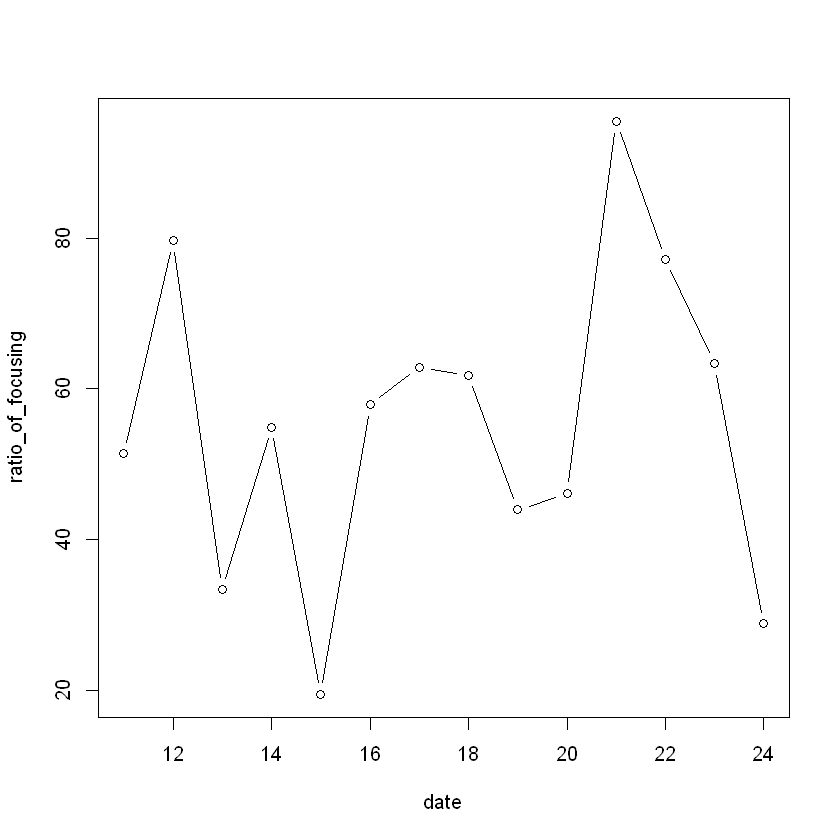

In [55]:
date <- 11:24
ratio_of_focusing <- a$per_good
plot(date, ratio_of_focusing, type = "b")